<a href="https://colab.research.google.com/github/Haseebasif7/Telco-Customer-Churn-Prediction/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
for i in df.columns:
  print(i,df[i].unique())
  print('\n')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


gender ['Female' 'Male']


SeniorCitizen [0 1]


Partner ['Yes' 'No']


Dependents ['No' 'Yes']


tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService ['No' 'Yes']


MultipleLines ['No phone service' 'No' 'Yes']


InternetService ['DSL' 'Fiber optic' 'No']


OnlineSecurity ['No' 'Yes' 'No internet service']


OnlineBackup ['Yes' 'No' 'No internet service']


DeviceProtection ['No' 'Yes' 'No internet service']


TechSupport ['No' 'Yes' 'No internet service']


StreamingTV ['No' 'Yes' 'No internet service']


StreamingMovies ['No' 'Yes' 'No internet service']


Contract ['Month-to-month' 'One year' 'Two year']


PaperlessBilling ['Yes' 'No']


PaymentMethod ['Electronic check' 'Mailed check' 'Bank tran

In [7]:
df['MultipleLines']=df['MultipleLines'].replace('No phone service','No')
list=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in list:
  df[i]=df[i].replace('No internet service','No')
  # As No internet service technically means No so instead of making this we convert it to No

In [8]:
for i in df.columns:
  print(i,df[i].unique())
  print('\n')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


gender ['Female' 'Male']


SeniorCitizen [0 1]


Partner ['Yes' 'No']


Dependents ['No' 'Yes']


tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService ['No' 'Yes']


MultipleLines ['No' 'Yes']


InternetService ['DSL' 'Fiber optic' 'No']


OnlineSecurity ['No' 'Yes']


OnlineBackup ['Yes' 'No']


DeviceProtection ['No' 'Yes']


TechSupport ['No' 'Yes']


StreamingTV ['No' 'Yes']


StreamingMovies ['No' 'Yes']


Contract ['Month-to-month' 'One year' 'Two year']


PaperlessBilling ['Yes' 'No']


PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


TotalCharges ['29.85' '1889.5' '108.15' ... 

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# as there was some value of type(object) so conerting to float

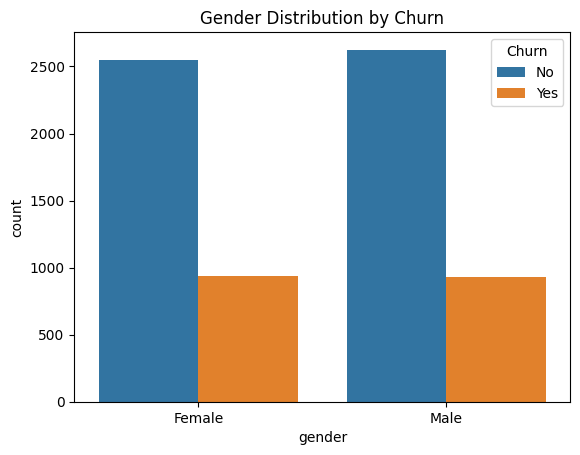

In [10]:
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Gender Distribution by Churn')
plt.show()

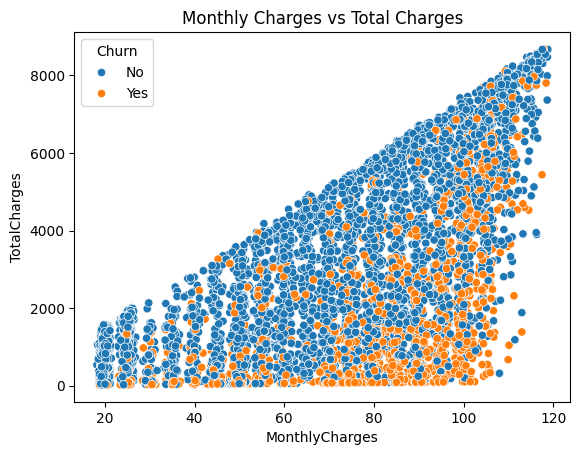

In [11]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Monthly Charges vs Total Charges')
plt.show()

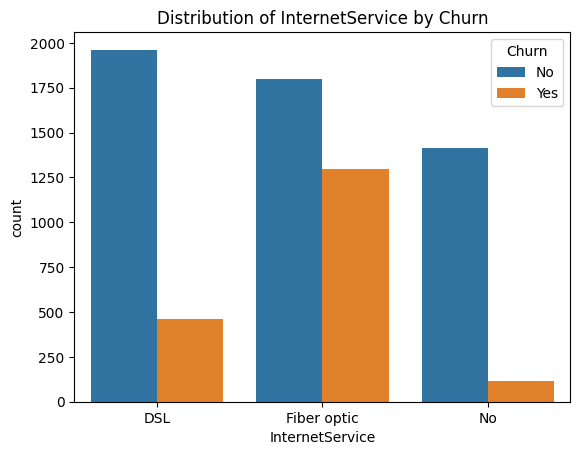

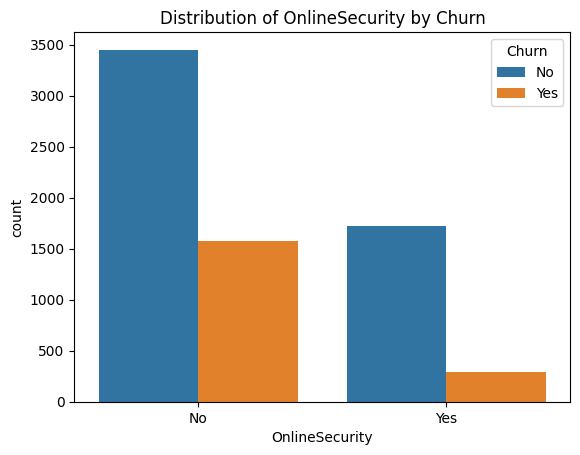

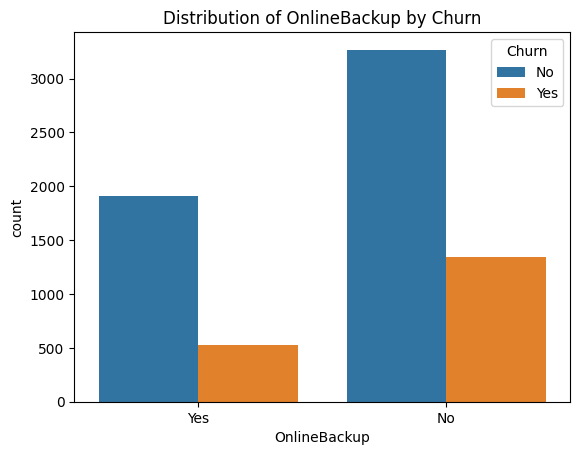

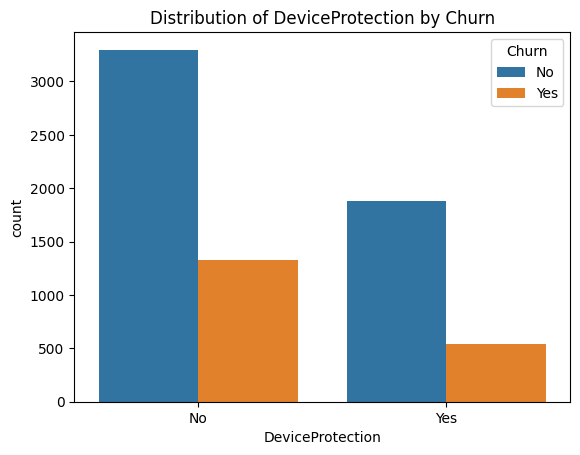

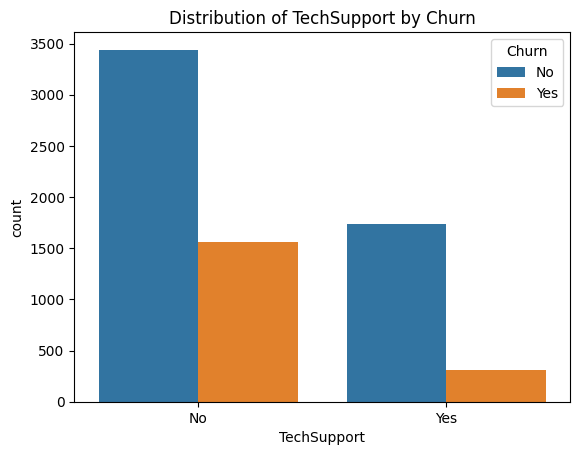

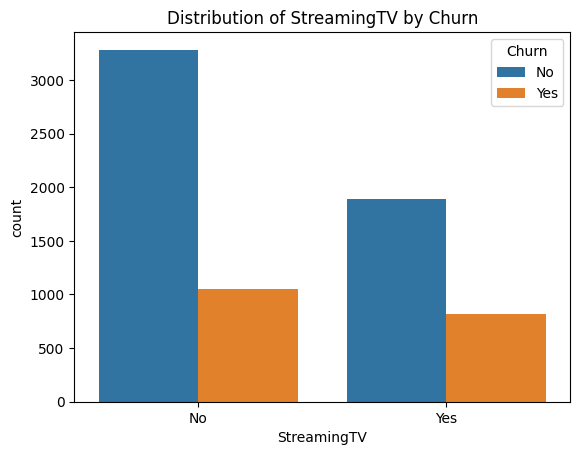

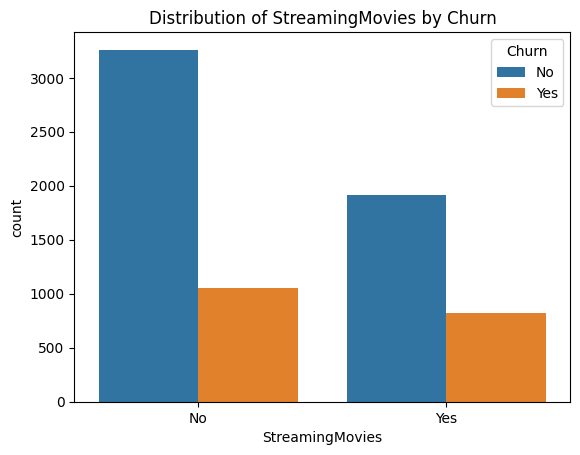

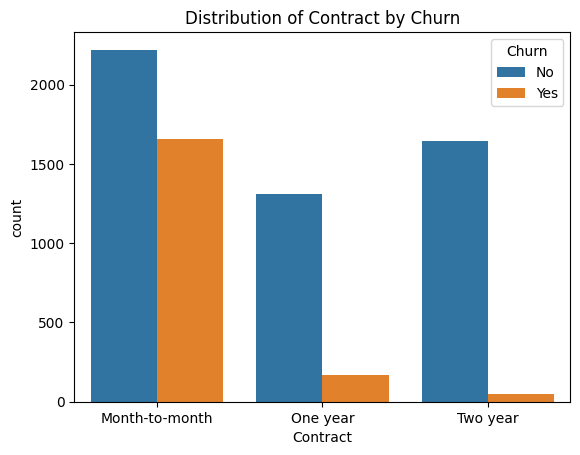

In [12]:
services = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract'
]

for service in services:
 sns.countplot(data=df,x=service,hue='Churn')
 plt.title(f'Distribution of {service} by Churn')
 plt.show() # plotting all serives wrt to Churn

In [13]:
df.drop(columns=['customerID'],inplace=True,axis=1)
# as ID dont play important role

In [14]:
categories=df.select_dtypes(include='object').columns
# selecting all columns of type (categorical) and applying label encoding on them
label=LabelEncoder()
for i in categories:
  df[i]=label.fit_transform(df[i])


In [15]:
def fun(x):
 if x==0:
  return -1
 else:
  return 1
  # changing 0 to -1 and 1 remains as for SVM

In [16]:
df['Churn'] = df['Churn'].apply(fun)
df.head() # applying fun (function)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,-1
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,-1
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,-1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [17]:
X=df.iloc[:,:-1] # extracting features
Y=df.iloc[:,-1] # extracting labels

In [18]:
X.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

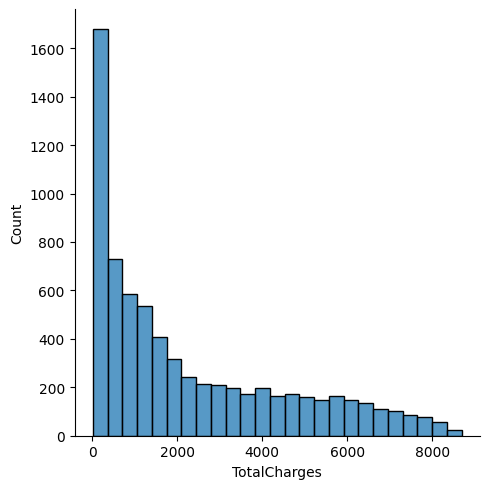

In [19]:
sns.displot(X['TotalCharges'])
plt.show()
#Outliers in this column so cant fill NAN values with mean so preferance will be median

In [20]:
X['TotalCharges']=X['TotalCharges'].fillna(X['TotalCharges'].median())

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,random_state=7,test_size=0.2)
print(X.shape,X_train.shape,X_test.shape) # splitting into training and testing

(7043, 19) (5634, 19) (1409, 19)


In [22]:
scaler=StandardScaler()
X_train_standardized=scaler.fit_transform(X_train)
X_test_standardized=scaler.transform(X_test) # applying standardization

In [23]:
class SVM_From_Scratch:  # SVM From Scratch

    def __init__(self, alpha = 0.001, lambda_param = 0.01, iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_param = lambda_param # tradeoff
        self.iterations = iterations # number of iterations
        self.w = None # weights or slopes
        self.b = 0 # intercept


    def fit(self, X, y):

        samples, features = X.shape
        self.w = np.zeros(features) # initalizing with 0
        self.b = 0 # initializewith 0

        # Convert y to a NumPy array to avoid indexing issues
        y = y.values

        for iteration in range(self.iterations):
            for index in range(samples):
                if y[index] * (np.dot(X[index], self.w) - self.b) >= 1 :
                    self.w -= self.alpha * (2 * self.lambda_param * self.w) # if true means it is outside on on the margin
                      # 2 lambda Regularization term
                else:
                  #if not true then means it is inside the margin and we have to shift it
                    self.w -= self.alpha * (2 * self.lambda_param * self.w - np.dot(X[index], y[index]))  # 2 *lambda*w Regularization term
                    self.b -= self.alpha * y[index]



    def predict(self, X):
      list=[]
      for i in range(len(X)):
        if(np.dot(X[i],self.w)-self.b)>=0:
          list.append(1)
        else:
          list.append(-1)
      return np.array(list)

In [24]:
model=SVC() # Applying Built In SVM Function
model.fit(X_train_standardized,y_train)

SVC()

In [25]:
pred_original=model.predict(X_test_standardized)
accuracy_original=accuracy_score(y_test,pred_original)
print(accuracy_original) #Built In SVM accuracy

0.8069552874378992


In [26]:
SVM_classifier=SVM_From_Scratch() # Evaluating On SVM From Scratch
SVM_classifier.fit(X_train_standardized,y_train)

In [27]:
pred_Scratch=SVM_classifier.predict(X_test_standardized)
accuracy_Scratch=accuracy_score(y_test,pred_Scratch)
print(accuracy_Scratch) # SVM from Scratch Accuracy

0.8112136266855926


In [28]:
print((accuracy_Scratch-accuracy_original)*100,'% Increase In accuracy Of Scratch SVM')

0.42583392476933657 % Increase In accuracy Of Scratch SVM


In [32]:
print(classification_report(y_test,pred_Scratch))
print('\n')
print(confusion_matrix(y_test,pred_Scratch))
print('\n')
print(roc_auc_score(y_test,pred_Scratch))
print('\n')
print(roc_curve(y_test,pred_Scratch))

              precision    recall  f1-score   support

          -1       0.85      0.91      0.88      1035
           1       0.68      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



[[941  94]
 [172 202]]


0.7246428479165052


(array([0.        , 0.09082126, 1.        ]), array([0.        , 0.54010695, 1.        ]), array([ 2,  1, -1]))
